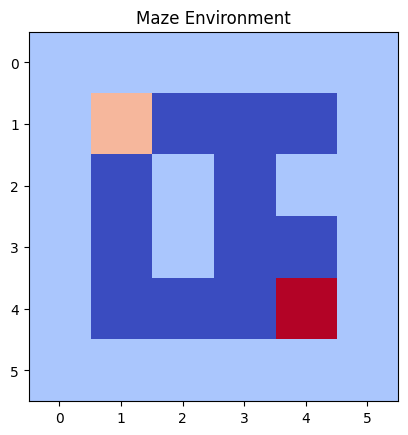

In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the environment grid (0: Free space, 1: Wall, 2: Start, 3: Goal)
maze = np.array([
    [1, 1, 1, 1, 1, 1],
    [1, 2, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 1],
    [1, 0, 1, 0, 0, 1],
    [1, 0, 0, 0, 3, 1],
    [1, 1, 1, 1, 1, 1]
])

# Visualization function to plot the maze
def plot_maze(maze):
    plt.imshow(maze, cmap='coolwarm')
    plt.title("Maze Environment")
    plt.show()

plot_maze(maze)

In [2]:
# Maze dimensions
rows, cols = maze.shape

# Initialize Q-table with zeros
Q_table = np.zeros((rows, cols, 4))  # 4 possible actions: Up, Down, Left, Right

# Define hyperparameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 1.0  # Exploration rate
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.005

In [3]:
# Define actions: [Up, Down, Left, Right]
actions = ['up', 'down', 'left', 'right']

# Reward system
def get_reward(state):
    if maze[state] == 3:  # Goal state
        return 100
    elif maze[state] == 1:  # Wall state
        return -100
    else:
        return -1  # Default penalty for each move

In [4]:
# Agent movement logic
def take_action(state, action):
    row, col = state

    if action == 'up' and row > 0:
        row -= 1
    elif action == 'down' and row < rows - 1:
        row += 1
    elif action == 'left' and col > 0:
        col -= 1
    elif action == 'right' and col < cols - 1:
        col += 1

    new_state = (row, col)

    if maze[new_state] == 1:  # If it's a wall, agent doesn't move
        return state
    return new_state

In [5]:
# Training the agent through episodes
num_episodes = 1000
max_steps = 100  # Max steps per episode

for episode in range(num_episodes):
    # Initialize starting state (find position of the '2' which is the start)
    state = tuple(np.argwhere(maze == 2)[0])
    total_rewards = 0

    for step in range(max_steps):
        # Choose action using epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action_index = random.randint(0, 3)  # Explore: random action
        else:
            action_index = np.argmax(Q_table[state])  # Exploit: best action

        action = actions[action_index]
        new_state = take_action(state, action)
        reward = get_reward(new_state)

        # Update Q-table using the Q-learning formula
        best_future_q = np.max(Q_table[new_state])
        Q_table[state][action_index] += learning_rate * (reward + discount_factor * best_future_q - Q_table[state][action_index])

        state = new_state
        total_rewards += reward

        # If goal is reached, end the episode
        if maze[state] == 3:
            break

    # Decay epsilon for less exploration over time
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)

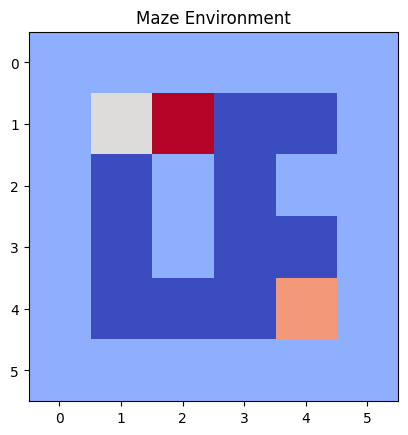

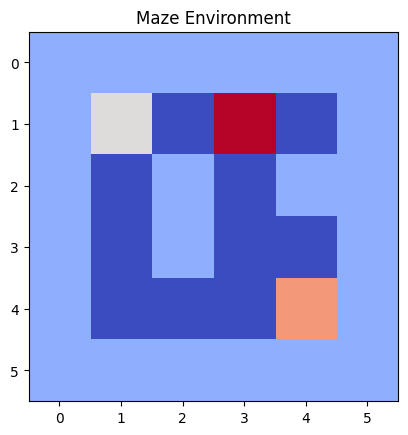

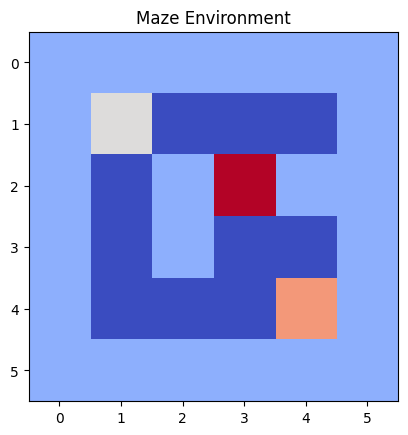

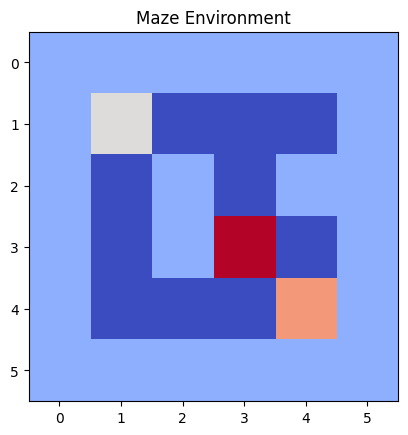

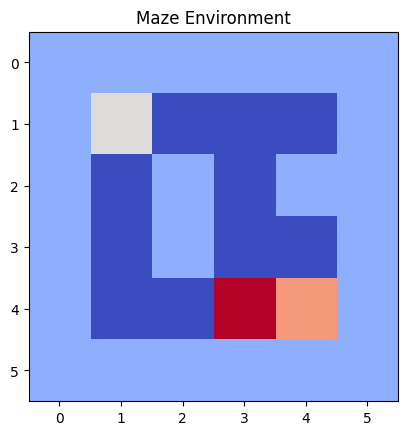

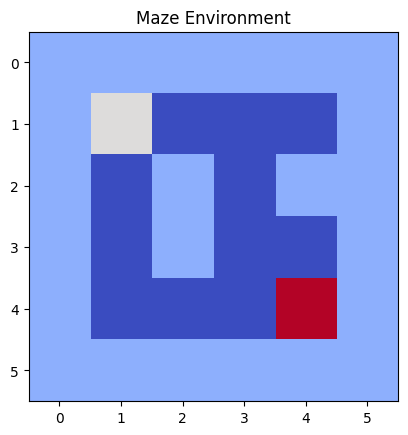

In [6]:
# Test the agent's policy after training
def test_agent():
    state = tuple(np.argwhere(maze == 2)[0])  # Start at the initial position
    steps = 0

    while maze[state] != 3 and steps < max_steps:
        action_index = np.argmax(Q_table[state])
        action = actions[action_index]
        state = take_action(state, action)
        steps += 1

        # Visualize the agent's movement in the maze
        maze_copy = maze.copy()
        maze_copy[state] = 4  # Mark the agent's position
        plot_maze(maze_copy)

test_agent()